In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

plt.rcParams['figure.figsize'] = (10.0, 8.0)
sns.set_theme()

# Chocolate Bar Ratings

### Context
Chocolate is one of the most popular candies in the world. Each year, residents of the United States collectively eat more than 2.8 billions pounds. However, not all chocolate bars are created equal! This dataset contains expert ratings of over 1,700 individual chocolate bars, along with information on their regional origin, percentage of cocoa, the variety of chocolate bean used and where the beans were grown.

### Flavors of Cacao Rating System:
- 5= Elite (Transcending beyond the ordinary limits)
- 4= Premium (Superior flavor development, character and style)
- 3= Satisfactory(3.0) to praiseworthy(3.75) (well made with special qualities)
- 2= Disappointing (Passable but contains at least one significant flaw)
- 1= Unpleasant (mostly unpalatable)

### Link
https://www.kaggle.com/rtatman/chocolate-bar-ratings

# Load Data and Start Initial Data Analysis

In [16]:
df = pd.read_csv(r"data\flavors_of_cacao.csv")
df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


## Perform Initial Transformations of Column Names

In [17]:
df = df.rename(columns={"Company\xa0\n(Maker-if known)": "Company",
                        "Specific Bean Origin\nor Bar Name": "Spec_Bean_Origin_or_Bar_Name",
                        "Review\nDate": "Review_Date",
                        "Cocoa\nPercent": "Cocoa_Percent",
                        "Company\nLocation": "Company_Location",
                        "Bean\nType": "Bean_Type",
                        "Broad Bean\nOrigin": "Broad_Bean_Origin"
                       })

In [18]:
df.head()

,Company,Spec_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


## Initial Analysis

In [19]:
# call df.describe() to get some statistics of numerical columns
df.describe()

,REF,Review_Date,Rating
count,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,3.185933
std,552.886365,2.927210,0.478062
min,5.000000,2006.000000,1.000000
25%,576.000000,2010.000000,2.875000
50%,1069.000000,2013.000000,3.250000
75%,1502.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


In [20]:
# call df.info to get data types and count of null values per column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Company                       1795 non-null   object 
 1   Spec_Bean_Origin_or_Bar_Name  1795 non-null   object 
 2   REF                           1795 non-null   int64  
 3   Review_Date                   1795 non-null   int64  
 4   Cocoa_Percent                 1795 non-null   object 
 5   Company_Location              1795 non-null   object 
 6   Rating                        1795 non-null   float64
 7   Bean_Type                     1794 non-null   object 
 8   Broad_Bean_Origin             1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


Looks like Bean_Type does not have any missing values, but it definitely has (first 5 entries of bean_type are already missing). Let's fetch the value for "missing" bean type and replace it with np.nan. Let's also check other columns for this kind of missing values.

In [21]:
missing_val_indication_bean_type = df.Bean_Type.values[0]

def replace_with_nan(missing_val_indication, current_val):
    if current_val == missing_val_indication:
        return np.nan
    else:
        return current_val

# replace missing value of Bean_Type with np.nan
df["Bean_Type"] = df["Bean_Type"].apply(lambda x: 
                                        replace_with_nan(missing_val_indication_bean_type, x))


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Company                       1795 non-null   object 
 1   Spec_Bean_Origin_or_Bar_Name  1795 non-null   object 
 2   REF                           1795 non-null   int64  
 3   Review_Date                   1795 non-null   int64  
 4   Cocoa_Percent                 1795 non-null   object 
 5   Company_Location              1795 non-null   object 
 6   Rating                        1795 non-null   float64
 7   Bean_Type                     907 non-null    object 
 8   Broad_Bean_Origin             1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [23]:
# Let's check other object columns for the same problem
for column in df.columns:
    if df[column].dtype == np.object:
        df[column] = df[column].apply(lambda x: replace_with_nan(missing_val_indication_bean_type, x))

C:\Users\Brus\AppData\Local\Continuum\anaconda3\envs\MachineLearning\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Company                       1795 non-null   object 
 1   Spec_Bean_Origin_or_Bar_Name  1795 non-null   object 
 2   REF                           1795 non-null   int64  
 3   Review_Date                   1795 non-null   int64  
 4   Cocoa_Percent                 1795 non-null   object 
 5   Company_Location              1795 non-null   object 
 6   Rating                        1795 non-null   float64
 7   Bean_Type                     907 non-null    object 
 8   Broad_Bean_Origin             1721 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


Seems like Broad_Bean_Origin had the same problem as Bean_Type.

In [25]:
# check unique values and drop columns only containing one unique value per row -> no learnings
for column in df.columns:
    print(f"Column {column} contains {df[column].unique().shape[0]} unique values.\n")

Column Company contains 416 unique values.

Column Spec_Bean_Origin_or_Bar_Name contains 1039 unique values.

Column REF contains 440 unique values.

Column Review_Date contains 12 unique values.

Column Cocoa_Percent contains 45 unique values.

Column Company_Location contains 60 unique values.

Column Rating contains 13 unique values.

Column Bean_Type contains 41 unique values.

Column Broad_Bean_Origin contains 100 unique values.



Let's now create a list of numerical features and categorical features in order to plot histograms or value_counts to get more insights.

In [26]:
# before EDA: Transform Cocoa_Percent to numerical by removing the % sign
df["Cocoa_Percent"] = df["Cocoa_Percent"].apply(lambda x: float(x.replace("%", "")))
df.head()

,Company,Spec_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,NaN,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,NaN,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,NaN,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,NaN,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,NaN,Peru


In [27]:
list_categorical_cols = list(df.columns[df.dtypes == np.object])
list_categorical_cols

C:\Users\Brus\AppData\Local\Continuum\anaconda3\envs\MachineLearning\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


['Company',
 'Spec_Bean_Origin_or_Bar_Name',
 'Company_Location',
 'Bean_Type',
 'Broad_Bean_Origin']

In [28]:
list_numerical_cols = list(df.columns[df.dtypes != np.object])
list_numerical_cols

C:\Users\Brus\AppData\Local\Continuum\anaconda3\envs\MachineLearning\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


['REF', 'Review_Date', 'Cocoa_Percent', 'Rating']

# Start EDA

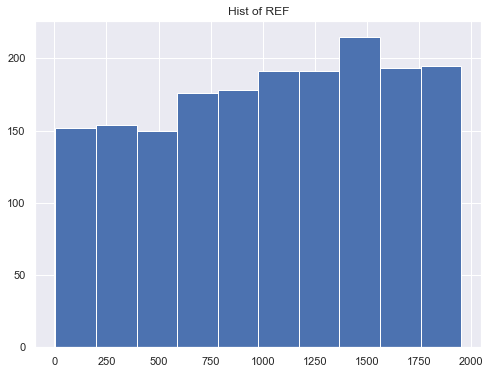

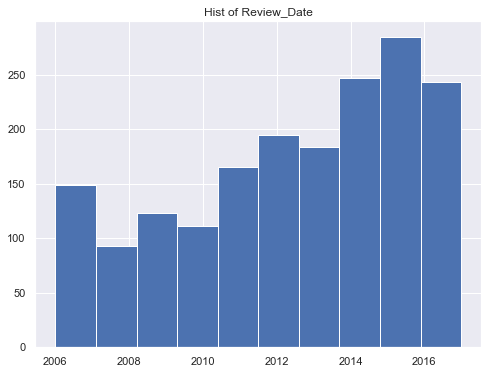

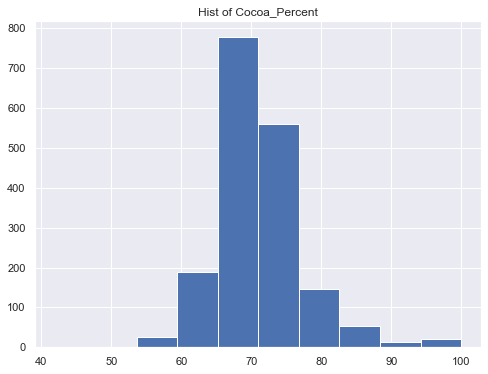

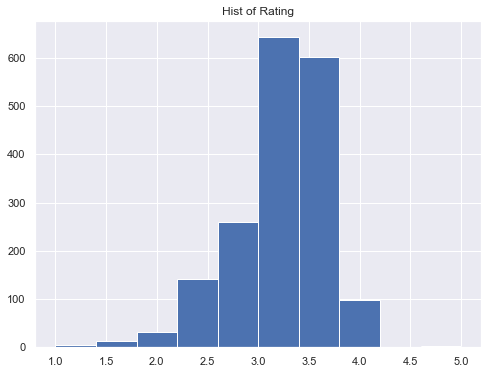

In [29]:
for numerical_feat in list_numerical_cols:
    plt.figure(figsize=(8.0, 6.0))
    plt.hist(df[numerical_feat])
    plt.title(f"Hist of {numerical_feat}")
    plt.show()

The target varialbe "Rating" looks right skewed -> later in feature engineering: correct this <br>
Cocoa_Percent is also little skewed -> can be corrected later

In [30]:
for cat_feature in list_categorical_cols:
    print(df[cat_feature].value_counts())

Soma                              47
Bonnat                            27
Fresco                            26
Pralus                            25
A. Morin                          23
                                  ..
Chaleur B                          1
Monsieur Truffe                    1
Durand                             1
Rococo (Grenada Chocolate Co.)     1
Dalloway                           1
Name: Company, Length: 416, dtype: int64
Madagascar                      57
Peru                            45
Ecuador                         42
Dominican Republic              37
Venezuela                       21
                                ..
Dominican Republic, Batch D2     1
Hacienda la Trinidad             1
Caraque                          1
Satipo region, white label       1
Ivory Coast, Batch 56/100        1
Name: Spec_Bean_Origin_or_Bar_Name, Length: 1039, dtype: int64
U.S.A.               764
France               156
Canada               125
U.K.                  96
Ital

Start with exploring the ratings.

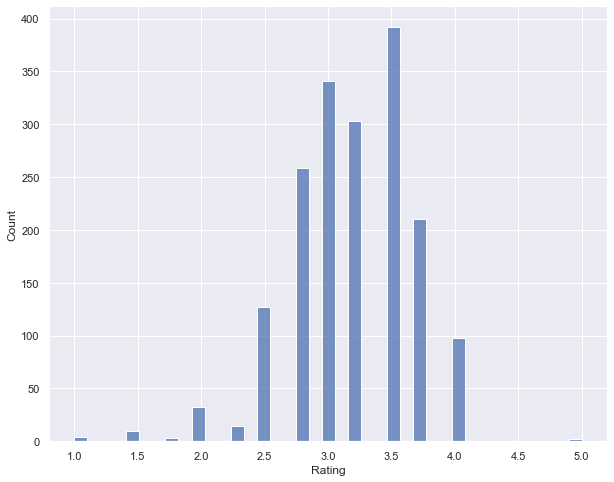

In [31]:
sns.histplot(data=df, x="Rating")
plt.show()

### Let's check bean types.

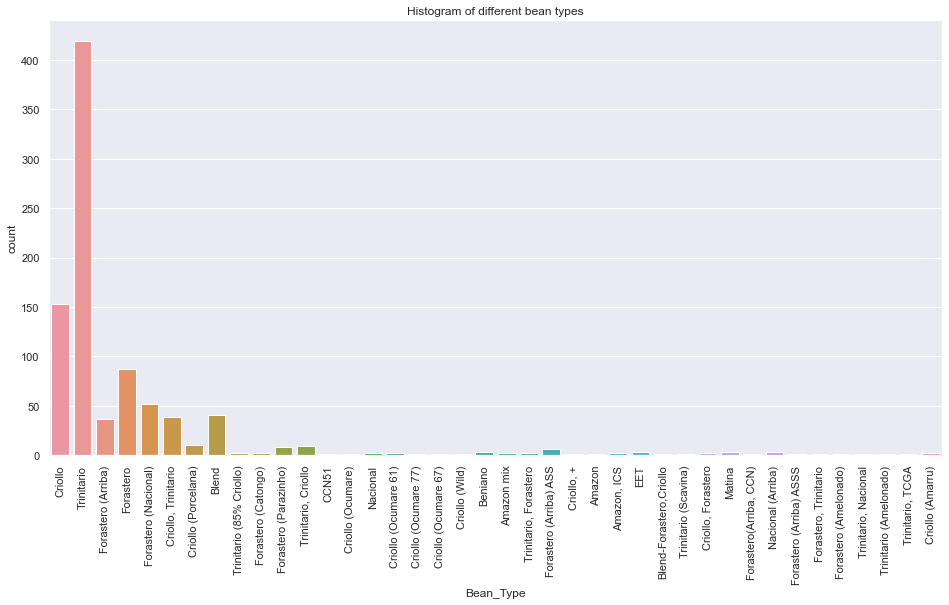

In [32]:
plt.figure(figsize=(16.0, 8.0))
sns.countplot(data=df, x="Bean_Type")
plt.title("Histogram of different bean types")
plt.xticks(rotation=90)
plt.show()

Transform the features of bean types such that:
1. One column for the most frequent bean types exists (Criollo, Trinitario, Forsastero, Beniano, Blend, Matina, EET, Nacional, Amazon). <br>
2. Check each bean type for the occurence of one of the categories and add a 1 if present, else a 0. <br>
3. Add a feature called "Num_Beans" to count the amount of beans per chocolate bar.
4. Add feature called "Is_Blend" to hold whether a chocolate bar is a mixture of more beans or not.

In [33]:
def check_category(category, value):
    try:
        if category in value:
            return 1
        else:
            return 0
    except: # catch if input is NaN -> return 0
        return 0

In [34]:
def check_NaN(category, value):
    try:
        if category in value:
            return 0
        else:
            return 0
    except: # catch if input is NaN -> return 1
        return 1

In [35]:
# Step 1 and 2)

df["Criollo"] = df["Bean_Type"].apply(lambda x: check_category("Criollo", x))
df["Trinitario"] = df["Bean_Type"].apply(lambda x: check_category("Trinitario", x))
df["Forsastero"] = df["Bean_Type"].apply(lambda x: check_category("Forsastero", x))
df["Beniano"] = df["Bean_Type"].apply(lambda x: check_category("Beniano", x))
df["Blend"] = df["Bean_Type"].apply(lambda x: check_category("Blend", x))
df["Matina"] = df["Bean_Type"].apply(lambda x: check_category("Matina", x))
df["EET"] = df["Bean_Type"].apply(lambda x: check_category("EET", x))
df["Nacional"] = df["Bean_Type"].apply(lambda x: check_category("Nacional", x))
df["Amazon"] = df["Bean_Type"].apply(lambda x: check_category("Amazon", x))
df["Unkown_Bean_Type"] = df["Bean_Type"].apply(lambda x: check_NaN("dummy", x))

In [36]:
df["Unkown_Bean_Type"].value_counts()

0    907
1    888
Name: Unkown_Bean_Type, dtype: int64

In [37]:
# Step 3)

df["Num_Beans"] = np.sum(df[["Criollo", "Trinitario", "Forsastero", "Beniano", "Matina", "EET", "Nacional", "Amazon"]], axis=1)

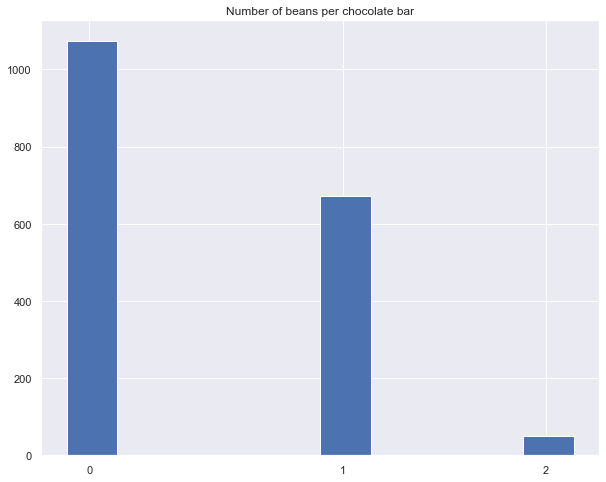

In [38]:
# plot num_beans
plt.hist(df["Num_Beans"])
plt.xticks([0.09, 1.09, 1.89], [0, 1, 2])
plt.title("Number of beans per chocolate bar")
plt.show()

In [39]:
df["Num_Beans"].value_counts()

0    1073
1     671
2      51
Name: Num_Beans, dtype: int64

In [40]:
# Step 4) 

df["Is_Blend"] = 0
df.loc[np.logical_or(df["Blend"] == 1, df["Num_Beans"] > 0), "Is_Blend"] = 1

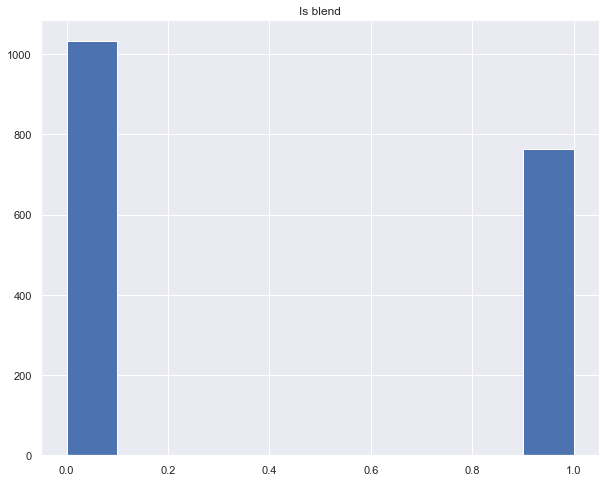

In [41]:
plt.hist(df["Is_Blend"])
plt.title("Is blend")
plt.show()

### Let's now check the specific geo-region of origin for the bar.

In [42]:
len(df["Spec_Bean_Origin_or_Bar_Name"].value_counts())

1039

In [43]:
pd.set_option('display.max_rows', None)
df["Spec_Bean_Origin_or_Bar_Name"].value_counts()

Madagascar                                       57
Peru                                             45
Ecuador                                          42
Dominican Republic                               37
Venezuela                                        21
Chuao                                            19
Sambirano                                        19
Ocumare                                          17
Papua New Guinea                                 15
Ghana                                            15
Belize                                           13
Bolivia                                          12
Tanzania                                         11
Grenada                                          11
Brazil                                           11
Costa Rica                                       11
Trinidad                                         11
Porcelana                                        11
La Red                                           11
Conacado    

In [44]:
pd.set_option('display.max_rows', 10)

Seems like there are a lot of different categories. Let's try to use stemming in order to map words with the same meaning together.

In [45]:
from nltk.stem import PorterStemmer

In [46]:
stemmer = PorterStemmer()
df["stemmed_spec_bean_origin_or_bar_name"] = df["Spec_Bean_Origin_or_Bar_Name"].apply(lambda x: stemmer.stem(x))

In [47]:
df["stemmed_spec_bean_origin_or_bar_name"].value_counts()

madagascar                       57
peru                             45
ecuador                          42
dominican republ                 37
venezuela                        21
                                 ..
grand 'ans                        1
tumbes, dear mr. finley, 2014     1
johe, xoco                        1
ecuador, puristiqu                1
moho river valley                 1
Name: stemmed_spec_bean_origin_or_bar_name, Length: 1037, dtype: int64

That doesn't seem to help here. So let's drop that column and add all single occurences to the class "Other". <br>
But first, let's remove all parts after the first comma, because some origins are containing useless information after the comma (like Madagascar, w/ nibs).

In [48]:
df.drop(columns="stemmed_spec_bean_origin_or_bar_name", inplace=True)

In [49]:
df["Spec_Bean_Origin_or_Bar_Name"] = df["Spec_Bean_Origin_or_Bar_Name"].apply(lambda x: x.split(",")[0])

In [50]:
len(df["Spec_Bean_Origin_or_Bar_Name"].value_counts())

682

Perfect! The number of categories was reduced drastically! Now let's add the category "Other" for single occurences.

In [51]:
# get list of single occurences
list_occurences = df["Spec_Bean_Origin_or_Bar_Name"].value_counts()
list_occurences

Madagascar                        68
Ecuador                           53
Peru                              50
Dominican Republic                45
Porcelana                         32
                                  ..
Nine                               1
Dong Nai                           1
Gran Couva 2005 P.                 1
Duo- Gran Couva & Camino Verde     1
Machu Pichu                        1
Name: Spec_Bean_Origin_or_Bar_Name, Length: 682, dtype: int64

In [52]:
df["Spec_Bean_Origin_or_Bar_Name"].value_counts().index

Index(['Madagascar', 'Ecuador', 'Peru', 'Dominican Republic', 'Porcelana',
       'Chuao', 'Sambirano', 'Ocumare', 'Venezuela', 'Los Rios',
       ...
       'Kolumbia', 'Phantom', 'Gran Blanco', 'Little Big Man',
       'Three Amigos(Chuao', 'Nine', 'Dong Nai', 'Gran Couva 2005 P.',
       'Duo- Gran Couva & Camino Verde', 'Machu Pichu'],
      dtype='object', length=682)

In [53]:
list_origin_count = list(zip(list_occurences.values, list_occurences.index))

In [54]:
list_single_categories = [list_origin_count[index][1] for index in range(len(list_origin_count)) if list_origin_count[index][0] == 1]

In [55]:
# replace
def replace_single_occurence(value, list_single_categories):
    if value in list_single_categories:
        return "Other"
    else:
        return value
    
    
df["Spec_Bean_Origin_or_Bar_Name"] = (df["Spec_Bean_Origin_or_Bar_Name"]
                                        .apply(lambda x: replace_single_occurence(x, list_single_categories)))

In [56]:
pd.set_option('display.max_rows', None)
df["Spec_Bean_Origin_or_Bar_Name"].value_counts()

Other                          475
Madagascar                      68
Ecuador                         53
Peru                            50
Dominican Republic              45
Porcelana                       32
Chuao                           30
Sambirano                       27
Ocumare                         25
Los Rios                        23
Venezuela                       23
Ghana                           21
Alto Beni                       18
Carenero Superior               17
Belize                          17
Papua New Guinea                17
Conacado                        16
Maranon                         15
La Red                          15
Camino Verde P.                 15
Bolivia                         14
Brazil                          13
Jamaica                         13
Tanzania                        13
Costa Rica                      13
Piura                           13
Trinidad                        12
Grenada                         12
Hispaniola          

In [57]:
pd.set_option('display.max_rows', 10)

In [58]:
# last: replace Madagascar w/ nibs with Madagascar
df["Spec_Bean_Origin_or_Bar_Name"] = (df["Spec_Bean_Origin_or_Bar_Name"]
                                          .apply(lambda x: x.replace("Madagascar w/ nibs", "Madagascar")))

In [59]:
df["Spec_Bean_Origin_or_Bar_Name"].value_counts()

Other                 475
Madagascar             70
Ecuador                53
Peru                   50
Dominican Republic     45
                     ... 
La Bahia                2
Papua                   2
Palo Blanco             2
Cusco                   2
Haleiwa E               2
Name: Spec_Bean_Origin_or_Bar_Name, Length: 207, dtype: int64

### Now let's check the broad bean origin feature.

In [60]:
pd.set_option('display.max_rows', None)
df["Broad_Bean_Origin"].value_counts()

Venezuela                        214
Ecuador                          193
Peru                             165
Madagascar                       145
Dominican Republic               141
Nicaragua                         60
Brazil                            58
Bolivia                           57
Belize                            49
Papua New Guinea                  42
Colombia                          40
Costa Rica                        38
Vietnam                           38
Tanzania                          34
Ghana                             33
Trinidad                          33
Mexico                            30
Guatemala                         28
Hawaii                            28
Domincan Republic                 25
Jamaica                           20
Grenada                           19
Indonesia                         16
Honduras                          15
Cuba                              11
Sao Tome                          10
Congo                             10
H

There are again a lot of single categories. But they seem to be a mixture of the more common categories. Let's first replace some short cuts of regions (i.e. Ven -> Venezuela) and then create the one-hot-encoding for the more common categories.

In [61]:
df["Broad_Bean_Origin"] = df["Broad_Bean_Origin"].astype(str)

In [62]:
df["Broad_Bean_Origin_New"] = df["Broad_Bean_Origin"]

In [63]:
df["Broad_Bean_Origin_New"] = df["Broad_Bean_Origin_New"].str.replace(r"Ven[,\.]", "Venezuela,", regex=True)
df["Broad_Bean_Origin_New"] = df["Broad_Bean_Origin_New"].str.replace(r"Ven$", "Venezuela,", regex=True)
df["Broad_Bean_Origin_New"] = df["Broad_Bean_Origin_New"].str.replace(r"Dom(.*) Rep(.*)", "Dominican Republic", regex=True)
df["Broad_Bean_Origin_New"] = df["Broad_Bean_Origin_New"].str.replace(r"D(\.*)R(\.*)", "Dominican Republic", regex=True)
df["Broad_Bean_Origin_New"] = df["Broad_Bean_Origin_New"].str.replace(r"Mad\.", "Madagascar", regex=True)
df["Broad_Bean_Origin_New"] = df["Broad_Bean_Origin_New"].str.replace(r"Mad$", "Madagascar", regex=True)
df["Broad_Bean_Origin_New"] = df["Broad_Bean_Origin_New"].str.replace(r"Mex$", "Mexico", regex=True)
df["Broad_Bean_Origin_New"] = df["Broad_Bean_Origin_New"].str.replace(r"Tobago", "Trinidad", regex=True)
df["Broad_Bean_Origin_New"] = df["Broad_Bean_Origin_New"].str.replace(r"Guat\.", "Guatemala", regex=True)
df["Broad_Bean_Origin_New"] = df["Broad_Bean_Origin_New"].str.replace(r"Nic\.", "Nicaragua", regex=True)
df["Broad_Bean_Origin_New"] = df["Broad_Bean_Origin_New"].str.replace(r"Ecu\.", "Ecuador", regex=True)
df["Broad_Bean_Origin_New"] = df["Broad_Bean_Origin_New"].str.replace(r"Ecuad\.", "Ecuador", regex=True)
df["Broad_Bean_Origin_New"] = df["Broad_Bean_Origin_New"].str.replace(r"Haw\.", "Hawaii", regex=True)
df["Broad_Bean_Origin_New"] = df["Broad_Bean_Origin_New"].str.replace(r"/Jam/", "/Jamaica", regex=True)

# replace single count countries with appropriate category to avoid single count values

# replace suriname with south america
df["Broad_Bean_Origin_New"] = df["Broad_Bean_Origin_New"].str.replace(r"Suriname", "South America", regex=True)
# replace nigeria with west africa
df["Broad_Bean_Origin_New"] = df["Broad_Bean_Origin_New"].str.replace(r"Nigeria", "West Africa", regex=True)
# replace martinique with carribean
df["Broad_Bean_Origin_New"] = df["Broad_Bean_Origin_New"].str.replace(r"Martinique", "Carribean", regex=True)
# replace cameroon with west africa
df["Broad_Bean_Origin_New"] = df["Broad_Bean_Origin_New"].str.replace(r"Cameroon", "West Africa", regex=True)
# replace gabon with Congo
df["Broad_Bean_Origin_New"] = df["Broad_Bean_Origin_New"].str.replace(r"Gabon", "Congo", regex=True)
# replace Burma with Malaysia 
df["Broad_Bean_Origin_New"] = df["Broad_Bean_Origin_New"].str.replace(r"Burma", "Malaysia", regex=True)

In [64]:
df["Broad_Bean_Origin_New"] = df["Broad_Bean_Origin_New"].apply(lambda x: x.replace("Sao Tome & Principe", "Sao_Tome_Principe"))
df["Broad_Bean_Origin_New"] = df["Broad_Bean_Origin_New"].apply(lambda x: x.replace("&", ","))
df["Broad_Bean_Origin_New"] = df["Broad_Bean_Origin_New"].apply(lambda x: x.replace("/", ","))
df["Broad_Bean_Origin_New"] = df["Broad_Bean_Origin_New"].apply(lambda x: x.replace("-", ","))

In [65]:
def replace_nan(value):
    if value == "nan":
        return "Unknown_Bean_Origin"
    else:
        return value

In [66]:
df["Broad_Bean_Origin_New"] = df["Broad_Bean_Origin_New"].apply(lambda x: replace_nan(x))

In [67]:
df["Broad_Bean_Origin_New"].value_counts()

Venezuela                                               214
Ecuador                                                 193
Dominican Republic                                      168
Peru                                                    165
Madagascar                                              145
Unknown_Bean_Origin                                      74
Nicaragua                                                60
Brazil                                                   58
Bolivia                                                  57
Belize                                                   49
Papua New Guinea                                         42
Colombia                                                 40
Costa Rica                                               38
Vietnam                                                  38
Trinidad                                                 35
Tanzania                                                 34
Ghana                                   

In [68]:
categories = df["Broad_Bean_Origin_New"].value_counts().index

In [69]:
new_categories = [element for element in categories if "," not in element and "(" not in element]

In [70]:
new_categories

['Venezuela',
 'Ecuador',
 'Dominican Republic',
 'Peru',
 'Madagascar',
 'Unknown_Bean_Origin',
 'Nicaragua',
 'Brazil',
 'Bolivia',
 'Belize',
 'Papua New Guinea',
 'Colombia',
 'Costa Rica',
 'Vietnam',
 'Trinidad',
 'Tanzania',
 'Ghana',
 'Mexico',
 'Hawaii',
 'Guatemala',
 'Jamaica',
 'Grenada',
 'Indonesia',
 'Honduras',
 'Cuba',
 'Congo',
 'Sao Tome',
 'Carribean',
 'Haiti',
 'Uganda',
 'Fiji',
 'St. Lucia',
 'West Africa',
 'Sao_Tome_Principe',
 'Panama',
 'Vanuatu',
 'Ivory Coast',
 'Philippines',
 'Malaysia',
 'India',
 'Puerto Rico',
 'Central and S. America',
 'Solomon Islands',
 'South America',
 'Australia',
 'Togo',
 'Liberia',
 'Samoa',
 'El Salvador',
 'Sri Lanka',
 'Principe']

In [71]:
def category_in_entry(category, value):
    if category in value:
        return 1
    else:
        return 0

In [72]:
for new_category in new_categories:
    df["Bean_Origin_" + new_category.replace(" ", "_").replace(".", "")] = df["Broad_Bean_Origin_New"].apply(
                                                                                lambda x: category_in_entry(new_category, x))

In [73]:
df.head()

,Company,Spec_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin,Criollo,...,Bean_Origin_Central_and_S_America,Bean_Origin_Solomon_Islands,Bean_Origin_South_America,Bean_Origin_Australia,Bean_Origin_Togo,Bean_Origin_Liberia,Bean_Origin_Samoa,Bean_Origin_El_Salvador,Bean_Origin_Sri_Lanka,Bean_Origin_Principe
0,A. Morin,Other,1876,2016,63.0,France,3.75,NaN,Sao Tome,0,...,0,0,0,0,0,0,0,0,0,0
1,A. Morin,Other,1676,2015,70.0,France,2.75,NaN,Togo,0,...,0,0,0,0,1,0,0,0,0,0
2,A. Morin,Other,1676,2015,70.0,France,3.00,NaN,Togo,0,...,0,0,0,0,1,0,0,0,0,0
3,A. Morin,Other,1680,2015,70.0,France,3.50,NaN,Togo,0,...,0,0,0,0,1,0,0,0,0,0
4,A. Morin,Other,1704,2015,70.0,France,3.50,NaN,Peru,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
df = df.drop(columns=["Bean_Type", "Broad_Bean_Origin", "Broad_Bean_Origin_New"])

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 70 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Company                            1795 non-null   object 
 1   Spec_Bean_Origin_or_Bar_Name       1795 non-null   object 
 2   REF                                1795 non-null   int64  
 3   Review_Date                        1795 non-null   int64  
 4   Cocoa_Percent                      1795 non-null   float64
 5   Company_Location                   1795 non-null   object 
 6   Rating                             1795 non-null   float64
 7   Criollo                            1795 non-null   int64  
 8   Trinitario                         1795 non-null   int64  
 9   Forsastero                         1795 non-null   int64  
 10  Beniano                            1795 non-null   int64  
 11  Blend                              1795 non-null   int64

In [76]:
len(df.columns[19:])

51

In [77]:
# print new bean origin counts
counts_origins = np.sum(df[df.columns[19:]], axis=0)
print(counts_origins)

Bean_Origin_Venezuela                227
Bean_Origin_Ecuador                  207
Bean_Origin_Dominican_Republic       177
Bean_Origin_Peru                     176
Bean_Origin_Madagascar               155
Bean_Origin_Unknown_Bean_Origin       74
Bean_Origin_Nicaragua                 61
Bean_Origin_Brazil                    58
Bean_Origin_Bolivia                   58
Bean_Origin_Belize                    50
Bean_Origin_Papua_New_Guinea          42
Bean_Origin_Colombia                  43
Bean_Origin_Costa_Rica                39
Bean_Origin_Vietnam                   38
Bean_Origin_Trinidad                  42
Bean_Origin_Tanzania                  34
Bean_Origin_Ghana                     40
Bean_Origin_Mexico                    31
Bean_Origin_Hawaii                    29
Bean_Origin_Guatemala                 29
Bean_Origin_Jamaica                   21
Bean_Origin_Grenada                   19
Bean_Origin_Indonesia                 18
Bean_Origin_Honduras                  15
Bean_Origin_Cuba

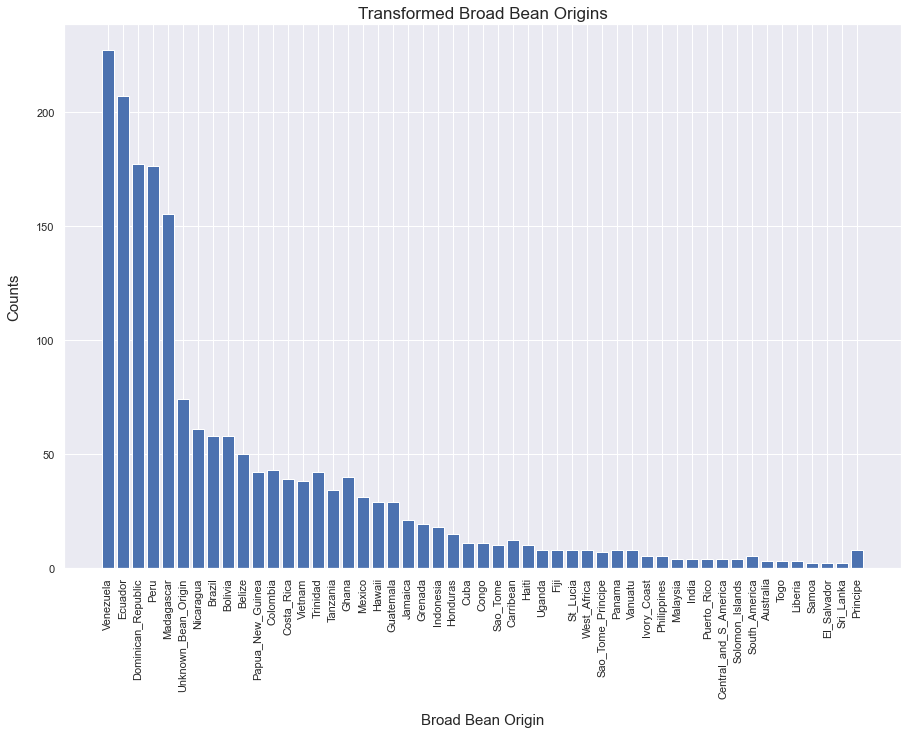

In [78]:
# create plot of different bean origin counts
labels = [origin.replace("Bean_Origin_", "") for origin in df.columns[19:].to_list()]
bins = np.arange(0, len(labels))

fig = plt.figure(figsize=(15.0, 10.0))
plt.bar(x=bins, height=counts_origins)
plt.xticks(bins, labels, rotation=90)
plt.xlabel("Broad Bean Origin", labelpad=15, size=15)
plt.ylabel("Counts", labelpad=15, size=15)
plt.title("Transformed Broad Bean Origins", size=17)
plt.show()

### Transform Company Location

In [79]:
# replace single occurences of company location with category "Other"
list_occurences = df["Company_Location"].value_counts()
list_origin_count = list(zip(list_occurences.values, list_occurences.index))

list_single_categories = [list_origin_count[index][1] for index in range(len(list_origin_count)) if list_origin_count[index][0] == 1]

In [80]:
# replace
def replace_single_occurence(value, list_single_categories):
    if value in list_single_categories:
        return "Other"
    else:
        return value
    
    
df["Company_Location"] = (df["Company_Location"]
                                        .apply(lambda x: replace_single_occurence(x, list_single_categories)))

In [81]:
df["Company_Location"].value_counts()

U.S.A.               764
France               156
Canada               125
U.K.                  96
Italy                 63
Ecuador               54
Australia             49
Belgium               40
Switzerland           38
Germany               35
Austria               26
Spain                 25
Colombia              23
Hungary               22
Venezuela             20
Japan                 17
Brazil                17
Madagascar            17
New Zealand           17
Peru                  17
Denmark               15
Vietnam               11
Other                 10
Scotland              10
Guatemala             10
Costa Rica             9
Israel                 9
Argentina              9
Poland                 8
Lithuania              6
Honduras               6
Domincan Republic      5
Sweden                 5
Nicaragua              5
South Korea            5
Puerto Rico            4
Sao Tome               4
Netherlands            4
Mexico                 4
Ireland                4


### Check Review Date

In [82]:
print(f'The first review was published in {df["Review_Date"].min()}, while the last review was published in {df["Review_Date"].max()}.')

The first review was published in 2006, while the last review was published in 2017.


### Check Company

In [83]:
df["Company"].value_counts()

Soma                                       47
Bonnat                                     27
Fresco                                     26
Pralus                                     25
A. Morin                                   23
Guittard                                   22
Domori                                     22
Arete                                      22
Valrhona                                   21
Hotel Chocolat (Coppeneur)                 19
Mast Brothers                              18
Coppeneur                                  18
Scharffen Berger                           17
Zotter                                     17
Rogue                                      16
Dandelion                                  16
Artisan du Chocolat                        16
Smooth Chocolator, The                     16
Szanto Tibor                               15
Castronovo                                 14
Bittersweet Origins                        14
Tejas                             

In [84]:
# let's drop column company -> very sparse -> maybe usefull later
df = df.drop(columns="Company")

## Transform Skewed Data

1.0586035291952456


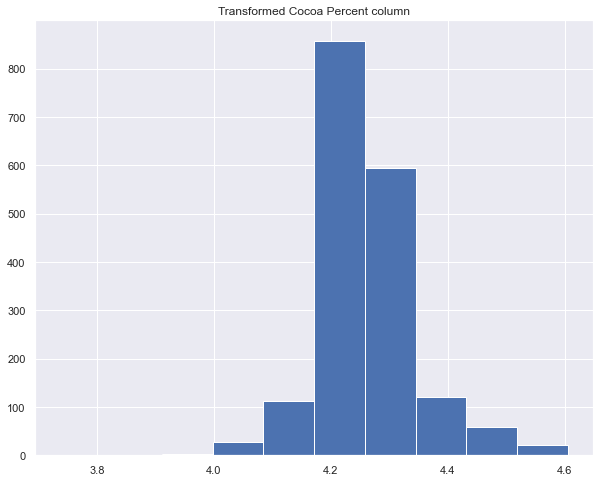

0.3029743174668294


In [85]:
# transform the skewed column Cocoa_Percent -> c.f. initial EDA -> use log transformation
print(df["Cocoa_Percent"].skew())
df["Cocoa_Percent"] = np.log(df["Cocoa_Percent"])
plt.hist(df["Cocoa_Percent"])
plt.title("Transformed Cocoa Percent column")
plt.show()
print(df["Cocoa_Percent"].skew())

## Encode Categorical Columns

In [86]:
df = pd.get_dummies(df)

In [87]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 325 columns):
 #   Column                                                    Dtype  
---  ------                                                    -----  
 0   REF                                                       int64  
 1   Review_Date                                               int64  
 2   Cocoa_Percent                                             float64
 3   Rating                                                    float64
 4   Criollo                                                   int64  
 5   Trinitario                                                int64  
 6   Forsastero                                                int64  
 7   Beniano                                                   int64  
 8   Blend                                                     int64  
 9   Matina                                                    int64  
 10  EET                                

## Split Data into Training and Testing Data

In [88]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [89]:
# create csv files
train_filepath = r"data\train.csv"
test_filepath = r"data\test.csv"

df_train.to_csv(train_filepath, index=False)
df_test.to_csv(test_filepath, index=False)